# Step 1 to 4 : Create the Rotation Matrix

In [ ]:
import numpy as np

def rotation(theta_x, theta_y, theta_z):
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(theta_x), -np.sin(theta_x)],
        [0, np.sin(theta_x), np.cos(theta_x)]
    ])
    Ry = np.array([
        [np.cos(theta_y), 0, -np.sin(theta_y)],
        [0, 1, 0],
        [np.sin(theta_y), 0, np.cos(theta_y)]
    ])

    Rz = np.array([
        [np.cos(theta_z), -np.sin(theta_z), 0],
        [np.sin(theta_z), np.cos(theta_z), 0],
        [0, 0, 1]
    ])

    rotmat = Rz @ Ry @ Rx
    return rotmat

# Step 5 : Define the Cube


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Vertices = np.array([
    [1, 1, 1],
    [-1, 1, 1],
    [1, -1, 1],
    [1, 1, -1],
    [-1, -1, 1],
    [-1, 1, -1],
    [1, -1, -1],
    [-1, -1, -1]
])

Edges = np.zeros((8, 8))
Edges[0, 1] = Edges[0, 2] = Edges[0, 3] = 1
Edges[1, 4] = Edges[1, 5] = 1
Edges[2, 4] = Edges[2, 6] = 1
Edges[3, 5] = Edges[3, 6] = 1
Edges[4, 7] = Edges[5, 7] = Edges[6, 7] = 1
Edges = Edges + Edges.T

# Step 6 : Apply Rotation

In [ ]:
theta_x = np.pi / 3
theta_y = np.pi / 4
theta_z = np.pi / 6

rotmat = rotation(theta_x, theta_y, theta_z)

# Step 7 : Rotate the Cube

In [ ]:
VertRot = Vertices @ rotmat.T

# Step 8 : 2D Projection


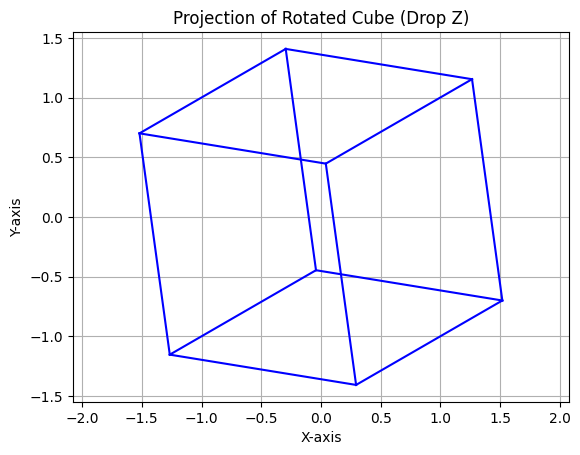

In [ ]:
plt.figure()
plt.axis('equal')
plt.title('Projection of Rotated Cube (Drop Z)')

for j in range(8):
    for k in range(j + 1, 8):
        if Edges[j, k] == 1:
            plt.plot([VertRot[j, 0], VertRot[k, 0]],
                     [VertRot[j, 1], VertRot[k, 1]], 'b-')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

# Step 9 : Projection Dropping y - axis

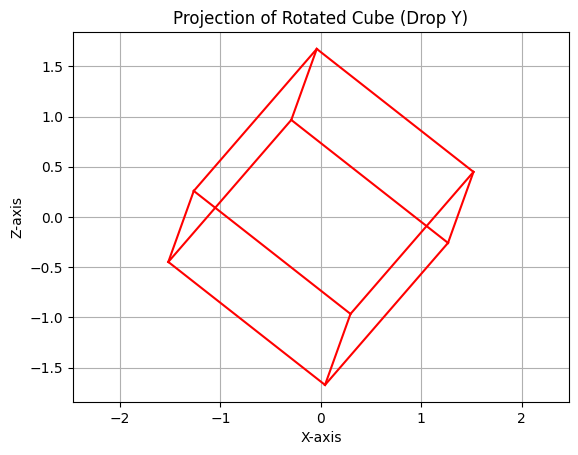

In [ ]:
plt.figure()
plt.axis('equal')
plt.title('Projection of Rotated Cube (Drop Y)')

for j in range(8):
    for k in range(j + 1, 8):
        if Edges[j, k] == 1:
            plt.plot([VertRot[j, 0], VertRot[k, 0]],
                     [VertRot[j, 2], VertRot[k, 2]], 'r-')

plt.xlabel('X-axis')
plt.ylabel('Z-axis')
plt.grid()
plt.show()

# Step 10 to 12 : Buckyball Projection

Number of vertices in the buckyball: 60


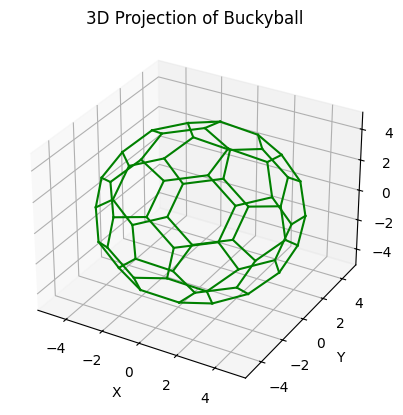

In [ ]:
import math
import itertools
from mpl_toolkits.mplot3d import Axes3D

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def makecoords():
    phi = (1 + math.sqrt(5)) / 2
    c1 = (0, 1, 3 * phi)
    c2 = (2, 1 + 2 * phi, phi)
    c3 = (1, 2 + phi, 2 * phi)

    combos1 = [(1, a, b) for a, b in itertools.product((1, -1), repeat=2)]
    combos23 = list(itertools.product((1, -1), repeat=3))
    coords = []

    for i in combos1:
        coords.append(np.multiply(c1, i))
    for i in combos23:
        coords.append(np.multiply(c2, i))
        coords.append(np.multiply(c3, i))

    P1 = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
    P2 = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
    for i in coords[:]:
        coords.append(P1 @ i)
        coords.append(P2 @ i)

    return coords

def makeadjmat(coords):
    D = np.zeros((60, 60))
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            if distance(coords[i], coords[j]) == 2.0:
                D[i][j] = D[j][i] = 1
    return D

def plot_buckyball(coords, edges, rotmat):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('3D Projection of Buckyball')
    rotated_coords = [rotmat @ vertex for vertex in coords]

    for j in range(60):
        for k in range(j + 1, 60):
            if edges[j, k] == 1:
                ax.plot(
                    [rotated_coords[j][0], rotated_coords[k][0]],
                    [rotated_coords[j][1], rotated_coords[k][1]],
                    [rotated_coords[j][2], rotated_coords[k][2]], 'g-'
                )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

coords = makecoords()
edges = makeadjmat(coords)
print("Number of vertices in the buckyball:", len(coords))

rotmat = rotation(theta_x, theta_y, theta_z)
plot_buckyball(coords, edges, rotmat)

# Step 13 : Load .mat Model and Draw It

In [12]:
from scipy.io import loadmat

data_v = loadmat("v.mat")
data_f = loadmat("f.mat")

v = data_v['v']
f = data_f['f']
print("Vertices (v):\n", v)
print("\nFaces (f):\n", f)

Vertices (v):
 [[ 58.64743805 111.18914032   6.92400026]
 [ 60.88143921 106.30313873  14.13500023]
 [ 67.99643707 114.31414032   8.17200089]
 ...
 [ 87.3354187   43.88992691   1.28999996]
 [ 97.1484375   53.10213852   1.47399998]
 [ 88.33444214  45.02913666   3.69500017]]

Faces (f):
 [[   1    2    3]
 [   4    5    6]
 [   7    8    9]
 ...
 [1312 1313 1314]
 [1315 1316 1317]
 [1318 1319 1320]]


# Step 14 : Load .mat Model and Draw It

In [13]:
mFaces, nFaces = f.shape
print("\nNumber of faces (mFaces):", mFaces)
print("Vertices per face (nFaces):", nFaces)


Number of faces (mFaces): 440
Vertices per face (nFaces): 3


# Step 15 : Load .mat Model and Draw It

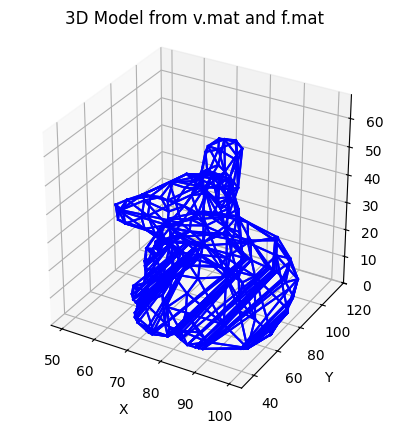

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
ax.set_title('3D Model from v.mat and f.mat')

for j in range(mFaces):
    ax.plot([v[f[j, 0] - 1, 0], v[f[j, 1] - 1, 0]],
            [v[f[j, 0] - 1, 1], v[f[j, 1] - 1, 1]],
            [v[f[j, 0] - 1, 2], v[f[j, 1] - 1, 2]], 'b-')
    ax.plot([v[f[j, 0] - 1, 0], v[f[j, 2] - 1, 0]],
            [v[f[j, 0] - 1, 1], v[f[j, 2] - 1, 1]],
            [v[f[j, 0] - 1, 2], v[f[j, 2] - 1, 2]], 'b-')
    ax.plot([v[f[j, 1] - 1, 0], v[f[j, 2] - 1, 0]],
            [v[f[j, 1] - 1, 1], v[f[j, 2] - 1, 1]],
            [v[f[j, 1] - 1, 2], v[f[j, 2] - 1, 2]], 'b-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()